# MOW 323 - Introduction to Simulation-Based Design
The package ***engmod*** will be used in this jupyter notebook. This package must be in the same directory as this jupyter notebook.

In [1]:
import numpy as np 
import importlib; 
import os
# if "add_engmod.py" in os.listdir(): print("Exists!"); import add_engmod
import engmod.structfem as sfem; importlib.reload(sfem)
import matplotlib.pyplot as plt 

In [69]:
help(sfem)

Help on module engmod.structfem in engmod:

NAME
    engmod.structfem

CLASSES
    builtins.object
        FEM_Truss_2D
    
    class FEM_Truss_2D(builtins.object)
     |  FEM_Truss_2D(node_coordinates, elem_connectivity, prescribed_displacement, prescribed_forces, element_properties_dict)
     |  
     |  This is a class that allows you to model a system using truss elements.
     |  
     |  Parameters
     |  ------------
     |  
     |  node_coordinates: array_like
     |      This is an N x 2 array with the N nodal coordinates. The first column is the x-coordinate, the second column is the y-coordinate.
     |      The row number indicates the node number.
     |  
     |      For example,
     |  
     |      [[0,0],[1,2]]
     |  
     |      [0,0] is the coordinate of node 0 (x = 0, y = 0)
     |      [1,2] is the coordinate of node 1 (x = 1, y = 2)
     |  
     |  elem_connectivity: array_like
     |      This is an M x 2 array which indicates which nodes are connected to f

# The module is imported as ***sfem*** and we will use the Truss elements.

In [2]:
help(sfem.FEM_Truss_2D)

Help on class FEM_Truss_2D in module engmod.structfem:

class FEM_Truss_2D(builtins.object)
 |  FEM_Truss_2D(node_coordinates, elem_connectivity, prescribed_displacement, prescribed_forces, element_properties_dict)
 |  
 |  This is a class that allows you to model a system using truss elements.
 |  
 |  Parameters
 |  ------------
 |  
 |  node_coordinates: array_like
 |      This is an N x 2 array with the N nodal coordinates. The first column is the x-coordinate, the second column is the y-coordinate.
 |      The row number indicates the node number.
 |  
 |      For example,
 |  
 |      [[0,0],[1,2]]
 |  
 |      [0,0] is the coordinate of node 0 (x = 0, y = 0)
 |      [1,2] is the coordinate of node 1 (x = 1, y = 2)
 |  
 |  elem_connectivity: array_like
 |      This is an M x 2 array which indicates which nodes are connected to form an element.
 |      The row number indicates the element number.
 |  
 |      For example,
 |  
 |      [[0,1],[1,2]]
 |  
 |      indicates that ele

# Problem 1


## Definition of the node's coordinates: 
```python
node_coordinates  = np.array([[0,0], # Node 0
                              [4,3], # Node 1
                              [4,0], # Node 2 
                              ]) 
```
## Definition of element connectivity. The element connectivity indicates which nodes are connected to form an element. 

```python
elem_connectivity  = np.array([[0,1], # Element 0
                               [0,2], # Element 1
                                    ])

```

## Prescribed displacement:

```python
prescribed_displacement  = np.array([[1,0,0], # Node 1, x-direction, 0 displacement
                                     [1,1,0], # Node 1, y-direction, 0 displacement
                                     [2,0,0], # Node 2, x-direction, 0 displacement
                                     [2,1,0], # Node 2, y-direction, 0 displacement
                                            ])
```

## Prescribed force

```python
prescribed_force = np.array([[0,1,-50000] #Node 0, y-direction, -50000 force
                            ])
```

## Definition of element properties. We must provide the value of E, A, $\rho$ for each element in the structure. 

```python

elem_E = np.array([E0,E1]) # Young's modulus of Element 0, Element 1
elem_A = np.array([A0,A1]) # Area of Element 0, Element 1

elemprop = {"A": elem_A, # We store the area in the key "A".
            "E": elem_E, # We store the Young's modulus in the key "E"
            "density": rho * np.ones(2)} # We store the density in the key "density".


```

## The model is initialised as `tmn`
```python

tmn = sfem.FEM_Truss_2D(node_coordinates,  # The coordinates of each node
                            elem_connectivity,          # The connectivity of the nodes to form elements
                            prescribed_displacement,    # The prescribed displacements
                            prescribed_force,           # The prescribed loads
                            elemprop)                   # The properties of the elements

```

## We can then access all the functionality of the code through `tmn`:

### Plotting the created system
```python
tmn.plot_system(show_element_numbers=True,show_node_numbers=True)
```

### Solving the system
```python
tmn.solve() 
```
### The solution dictionary
```python
tmn.solution_dict
```
### Print the solution of the nodal displacements, nodal forces, element strains and element stresses.
```python
tmn.post_print_solution()
```
### Visualise the system with the displaced system. The magnification factor is used to increase the displacement.
```python
tmn.plot_system(show_element_numbers=False,
                show_node_numbers=False,
                show_displacement=True,
                magnification=1000)
```
### The stress and strain in each element:
```python
tmn.post_stress_strain()
```
### Obtain the force associated with a node:
```python
tmn.post_get_force(0,1)
```
### Obtain the displacement associated with a node:
```python
tmn.post_get_displacement(0,1)
```
### Obtain the stress in the elements:
```python
tmn.post_get_stress(elemnumber)
```



### THe mass of the system:
```python
tmn.get_mass()
```

In [2]:
node_coordinates  = np.array([[0,0], # Node 0
                              [3,3], # Node 1
                              [3,0], # Node 2 
                              ]) 

print("Nodal coordinates:",node_coordinates.shape)

elem_connectivity  = np.array([[0,1], # Element 0
                               [0,2], # Element 1
                                    ])

print("Element connectivity:",elem_connectivity.shape)

prescribed_displacement  = np.array([[1,0,0], # Node 1, x-direction, 0 displacement
                                     [1,1,0], # Node 1, y-direction, 0 displacement
                                     [2,0,0], # Node 2, x-direction, 0 displacement
                                     [2,1,0], # Node 2, y-direction, 0 displacement
                                            ])

print("Prescribed displacement:",prescribed_displacement.shape)

prescribed_force = np.array([[0,1,-50000] #ode 0, y-direction, -50000 force
                            ])

print("Prescribed forces:",prescribed_force.shape)

E   = 200E9 # GPa
A   = 0.0025
rho = 7800  # kg/m^3

elem_E = np.array([E,E])           # Young's modulus of Element 0, Element 1
elem_A = np.array([A,A])           # Area of Element 0, Element 1

print("elem_E/10^9:",elem_E/1E9)
print("elem_A",elem_A)

elemprop = {"A": elem_A,
            "E": elem_E,
            "density": rho * np.ones(2)}

tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                            elem_connectivity,       # The connectivity of the nodes to form elements
                            prescribed_displacement, # The prescribed displacements
                            prescribed_force,        # The prescribed loads
                            elemprop)                # The properties of the elements


Nodal coordinates: (3, 2)
Element connectivity: (2, 2)
Prescribed displacement: (4, 3)
Prescribed forces: (1, 3)
elem_E/10^9: [200. 200.]
elem_A [0.0025 0.0025]


## Visualise the system

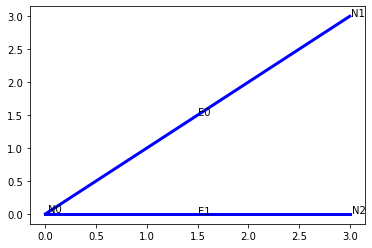

In [3]:
tmn.plot_system()

## Visualise the system without numbers

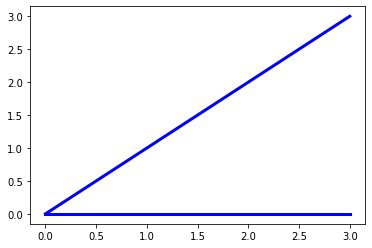

In [4]:
tmn.plot_system(show_element_numbers=False,show_node_numbers=False)

## Solve the system of equations

We can find the unknown forces and displacements by partitioning and solving the system of equations:
$$
\{f\} = [K] \{u\}
$$

In [5]:
tmn.solve()

{'displacements': array([ 0.0003    , -0.00114853,  0.        ,  0.        ,  0.        ,
         0.        ]),
 'loads': array([     0., -50000.,  50000.,  50000., -50000.,      0.])}

## Solved displacement and force results

In [6]:
tmn.solution_dict

{'displacements': array([ 0.0003    , -0.00114853,  0.        ,  0.        ,  0.        ,
         0.        ]),
 'loads': array([     0., -50000.,  50000.,  50000., -50000.,      0.])}

### Nodal displacements

In [41]:
tmn.solution_dict["displacements"]

array([ 0.0003    , -0.00114853,  0.        ,  0.        ,  0.        ,
        0.        ])

### Nodal forces

In [42]:
tmn.solution_dict["loads"]

array([     0., -50000.,  50000.,  50000., -50000.,      0.])

## Print the nodal solution and stresses

In [43]:
tmn.post_print_solution()

                     Node 0                     
u_x: 0.300000 x 10^-3, u_y: -1.148528 x 10^-3, F_x: 0.000000, F_y: -50000.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 50000.000000, F_y: 50000.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -50000.000000, F_y: 0.000000

                     Element 0                     
stress: 28.284271 x 10^6, strain: 0.000141
                     Element 1                     
stress: -20.000000 x 10^6, strain: -0.000100


## Obtain the force for a specific node and direction

In [44]:
tmn.post_get_force(0,1)

-50000.0

## Obtain the displacement for a specific node and direction

In [45]:
tmn.post_get_displacement(0,1)

-0.0011485281374238568

## Obtain the stress for a specific element

In [46]:
tmn.post_get_stress(0)

28284271.2474619

## Plot the deformed system

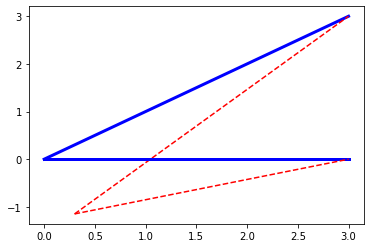

In [7]:
tmn.plot_system(show_element_numbers=False,
                show_node_numbers=False,
                show_displacement=True,
                magnification=1000)

## Obtain the stress and strain for each element

In [48]:
tmn.post_stress_strain()

{'strain': array([ 1.41421356e-04, -1.00000000e-04]),
 'stress': array([ 28284271.2474619, -20000000.       ])}

## Obtain the stress for each element

In [49]:
tmn.post_stress_strain()["stress"]

array([ 28284271.2474619, -20000000.       ])

## Obtain the internal forces for each element

$$
N_{i} = \sigma_{i} \cdot A_{i}
$$

In [50]:
print("A",elem_A)
print("Stress",tmn.post_stress_strain()["stress"])

tmn.post_stress_strain()["stress"] * elem_A

A [0.0025 0.0025]
Stress [ 28284271.2474619 -20000000.       ]


array([ 70710.67811865, -50000.        ])

# The mass of the system

In [51]:
tmn.get_mass()

141.23149339882605

In [52]:
rho * np.dot(elem_A,np.array([4,np.sqrt(4**2 + 3**2)]))

175.5

## Design parametrisation

We can parameterize the model to investigate the influence the influence of parameters (e.g. cross-sectional area, node position, Young's modulus, loads) on the outcome of the model (e.g. stress, strain, displacement, safety factor, ...).

**Inputs**

In the section below, we will parameterize the cross-sectional areas:
$$
A_{0} = A \\
A_{1} = A
$$
Both cross-sectional areas are the same and equal to $A$, where $A$ must be specified as an input to the model.

**Outputs**

We will monitor
- The vertical displacement of node $0$.
- The stress in each element.


In [53]:
def parameterised_model(A):
    
    node_coordinates  = np.array([[0,0], # Node 0
                                  [4,3], # Node 1
                                  [4,0], # Node 2 
                                  ]) 


    elem_connectivity  = np.array([[0,1], # Element 0
                                   [0,2], # Element 1
                                        ])


    prescribed_displacement  = np.array([[1,0,0], # Node 1, x-direction, 0 displacement
                                         [1,1,0], # Node 1, y-direction, 0 displacement
                                         [2,0,0], # Node 2, x-direction, 0 displacement
                                         [2,1,0], # Node 2, y-direction, 0 displacement
                                                ])

    prescribed_force = np.array([[0,1,-50000] #ode 0, y-direction, -50000 force
                                ])

    E   = 200E9 # GPa
    rho = 7800  # kg/m^3

    elem_E = np.array([E,E])           # Young's modulus of Element 0, Element 1
    elem_A = np.array([A,A])           # Area of Element 0, Element 1

    elemprop = {"A": elem_A,
                "E": elem_E,
                "density": rho * np.ones(2)}

    tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                                elem_connectivity,       # The connectivity of the nodes to form elements
                                prescribed_displacement, # The prescribed displacements
                                prescribed_force,        # The prescribed loads
                                elemprop)                # The properties of the elements

    tmn.solve()

    v0 = tmn.post_get_displacement(0,1)

    stress = [tmn.post_get_stress(0),tmn.post_get_stress(1)]

    return [v0,stress]



## NOTE:

Each time that you run the parameterised_model function, you solve a FEM. This can be VERY expensive for higher fidelity models. The solution to this is to perform a number of FEMs and to build a regression model for the inputs and outputs. **IF** this regression model is accurate, it can replace the FEM, which is much faster to run. These regression models are referred to as response surfaces, surrogates or emulators.



Text(0, 0.5, 'Stress magnitude (element 1) [MPa]')

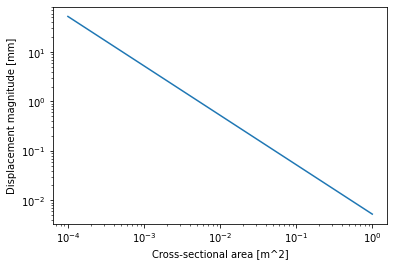

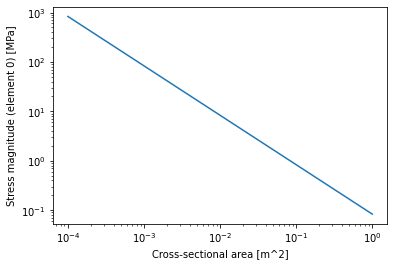

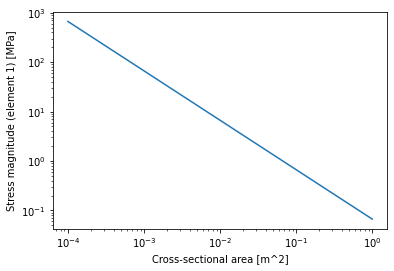

In [54]:
Avec = np.logspace(-4,0)
    
displacement = []
stress = []
for A in Avec:
    v0,s = parameterised_model(A)
    
    displacement.append(v0)
    
    stress.append(s)
    
displacement = np.array(displacement)
stress = np.array(stress)
    
plt.figure(1)
plt.loglog(Avec,abs(displacement)*1000)
plt.ylabel("Displacement magnitude [mm]")
plt.xlabel("Cross-sectional area [m^2]")

plt.figure(2)
plt.loglog(Avec,abs(stress[:,0])/1E6)
plt.xlabel("Cross-sectional area [m^2]")
plt.ylabel("Stress magnitude (element 0) [MPa]")

plt.figure(3)
plt.loglog(Avec,abs(stress[:,1])/1E6)
plt.xlabel("Cross-sectional area [m^2]")
plt.ylabel("Stress magnitude (element 1) [MPa]")


## Response surface

It would be very easy to accurately model the responses above with a first order polynomial: 
$$
\log |v_{0}| = w_{0} + w_{1} \cdot \log |A|
$$
$$
\log |\sigma_{0}| = w_{2} + w_{3} \cdot \log |A|
$$
$$
\log |\sigma_{1}| = w_{4} + w_{5} \cdot \log |A|
$$
It is seldom this easy.


## Design parametrisation (Two-variables)

We can parameterize the model to investigate the influence the influence of parameters (e.g. cross-sectional area, node position, Young's modulus, loads) on the outcome of the model (e.g. stress, strain, displacement, safety factor, ...).

**Inputs**

In the section below, we will parameterize the cross-sectional areas:
$$
A_{0} = a \\
A_{1} = b
$$
where $a$ and $b$ are the two parameters we can choose.

**Outputs**

We will monitor
- The vertical displacement of node $0$.
- The stress in each element.

In [55]:
def parameterised_model2(list_A0_and_A1):
    
    node_coordinates  = np.array([[0,0], # Node 0
                                  [4,3], # Node 1
                                  [4,0], # Node 2 
                                  ]) 


    elem_connectivity  = np.array([[0,1], # Element 0
                                   [0,2], # Element 1
                                        ])


    prescribed_displacement  = np.array([[1,0,0], # Node 1, x-direction, 0 displacement
                                         [1,1,0], # Node 1, y-direction, 0 displacement
                                         [2,0,0], # Node 2, x-direction, 0 displacement
                                         [2,1,0], # Node 2, y-direction, 0 displacement
                                                ])

    prescribed_force = np.array([[0,1,-50000] #ode 0, y-direction, -50000 force
                                ])

    E   = 200E9 # GPa
    rho = 7800  # kg/m^3

    elem_E = np.array([E,E])           # Young's modulus of Element 0, Element 1
    elem_A = np.array(list_A0_and_A1)  # Area of Element 0, Element 1

    elemprop = {"A": elem_A,
                "E": elem_E,
                "density": rho * np.ones(2)}

    tmn = sfem.FEM_Truss_2D(node_coordinates,            # The coordinates of each node
                                elem_connectivity,       # The connectivity of the nodes to form elements
                                prescribed_displacement, # The prescribed displacements
                                prescribed_force,        # The prescribed loads
                                elemprop)                # The properties of the elements

    tmn.solve()

    v0 = tmn.post_get_displacement(0,1)

    stress = [tmn.post_get_stress(0),tmn.post_get_stress(1)]

    return [v0,stress]


Number of FEMs solved: 2550


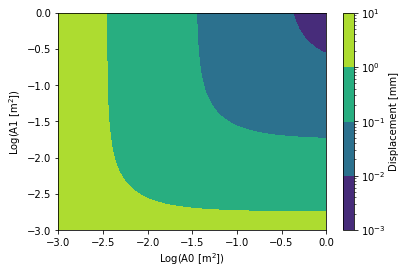

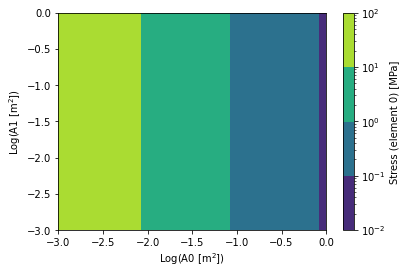

In [56]:
A0vec = np.logspace(-3,0,50)
A1vec = np.logspace(-3,0,51)
    
displacement = np.zeros([A0vec.shape[0],A1vec.shape[0]])
stress_elem0 = np.zeros([A0vec.shape[0],A1vec.shape[0]])

number_of_fems_solved = 0
for idx,A0 in enumerate(A0vec):
    
    for idy,A1 in enumerate(A1vec):
    
        number_of_fems_solved += 1
    
        v0,s = parameterised_model2([A0,A1])

        displacement[idx,idy] = v0

        stress_elem0[idx,idy] = s[0]
        
from matplotlib import ticker, cm

print("Number of FEMs solved:",int(number_of_fems_solved))

plt.figure(1)
plt.contourf(np.log10(A0vec),np.log10(A1vec),(np.abs(displacement.T)*1000), locator=ticker.LogLocator())
cbar = plt.colorbar()
plt.xlabel("Log(A0 [m$^2$])")
plt.ylabel("Log(A1 [m$^2$])")
cbar.set_label('Displacement [mm]', rotation=90)


plt.figure(2)
plt.contourf(np.log10(A0vec),np.log10(A1vec),(np.abs(stress_elem0.T)/1E6), locator=ticker.LogLocator())
cbar = plt.colorbar()
plt.xlabel("Log(A0 [m$^2$])")
plt.ylabel("Log(A1 [m$^2$])")
cbar.set_label('Stress (element 0) [MPa]', rotation=90)


# Problem 2

In [57]:
node_coordinates  = np.array([[0,0], # Node 0
                   [4,0], # Node 1
                   [0,3], # Node 2
                   [4,3], # Node 3
                   [0,6], # Node 4
                   [4,6], # Node 5
                  ])

elem_connectivity  = np.array([[0,1], # Element 0, Node 0 connected to Node 1
                              [0,2],  # Element 1, Node 0 connected to Node 2
                              [1,2],  # Element 2, Node 2 connected to Node 2
                              [1,3],  # Element 3, Node 1 connected to Node 3
                              [2,3],  # Element 4, Node 2 connected to Node 3
                              [2,4],  # Element 5, Node 2 connected to Node 4                               
                              [2,5],  # Element 6, Node 2 connected to Node 5
                              [3,5],  # Element 7, Node 3 connected to Node 5
                              [4,5]]) # Element 8, Node 4 connected to Node 5

prescribed_displacement = np.array([[0,0,0],  # Node 0, x-direction, 0m
                                    [0,1,0],  # Node 0, y-direction, 0m
                                    [1,1,0]]) # Node 1, y-direction, 0m

prescribed_force = np.array([[3,0,100E3],  # Node 3, x-direction, 100000N
                             [5,0,200E3]]) # Node 5, x-direction, 200000N


# Young's modulus  E0  , E1  , E2  , E3  , E4  , E5  , E6  , E7  , E8 in Pa
elem_E = np.array([200., 200., 200., 200., 200., 200., 200., 200.,200.]) *1E9

# Cross-sect. A:   A0,A1,A2,A3,A4,A5,A6,A7,A8  m^2
elem_A = np.array([30,30,20,30,20,30,20,30,20])/1E4 

# Densities    : 7800 * [1,1,1,1,1,1,1,1,1] kg/m^3
elem_density = np.ones(elem_A.shape)*7800.0

# Element properties dictionary:
elemprop = {"A": elem_A, # Cross-sectional area
            "E": elem_E, # Young's modulus
            "density": elem_density} #Density

# Initialise the model
tr2 = sfem.FEM_Truss_2D(node_coordinates,
                            elem_connectivity,
                            prescribed_displacement,
                            prescribed_force,
                            elemprop)



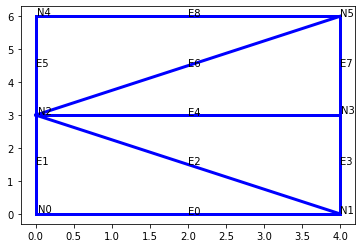

In [58]:
tr2.plot_system()

In [59]:
# tr2.post_print_solution()
tr2.solve()

{'displacements': array([ 0.        ,  0.        ,  0.002     ,  0.        ,  0.00926563,
         0.001875  ,  0.01026563, -0.00075   ,  0.01570313,  0.001875  ,
         0.01570313, -0.0015    ]),
 'loads': array([-300000., -375000.,       0.,  375000.,       0.,       0.,
         100000.,       0.,       0.,       0.,  200000.,       0.])}

In [60]:
tr2.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -300000.000000, F_y: -375000.000000
                     Node 1                     
u_x: 2.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 0.000000, F_y: 375000.000000
                     Node 2                     
u_x: 9.265625 x 10^-3, u_y: 1.875000 x 10^-3, F_x: 0.000000, F_y: 0.000000
                     Node 3                     
u_x: 10.265625 x 10^-3, u_y: -0.750000 x 10^-3, F_x: 100000.000000, F_y: 0.000000
                     Node 4                     
u_x: 15.703125 x 10^-3, u_y: 1.875000 x 10^-3, F_x: 0.000000, F_y: 0.000000
                     Node 5                     
u_x: 15.703125 x 10^-3, u_y: -1.500000 x 10^-3, F_x: 200000.000000, F_y: 0.000000

                     Element 0                     
stress: 100.000000 x 10^6, strain: 0.000500
                     Element 1                     
stress: 125.000000 x 10^6, strain: 0.000625
                     Element 2 

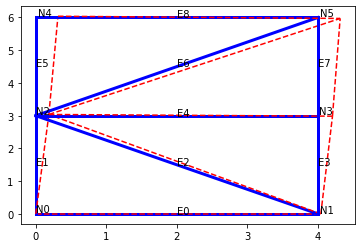

In [61]:
tr2.plot_system(show_displacement=True,magnification=20)

# Problem 3

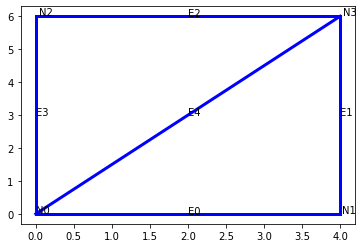

In [62]:
node_coordinates  = np.array([[0,0],  # Node 0
                              [4,0],  # Node 1
                              [0,6],  # Node 2
                              [4,6]]) # Node 3

elem_connectivity  = np.array([[0,1], # Element 0
                               [1,3], # Element 1
                               [2,3], # Element 2
                               [0,2], # Element 3
                               [0,3]]) # Element 4

prescribed_displacement = np.array([[0,0,0],  # Node 0, x-direction, 0m
                                    [0,1,0],  # Node 0, y-direction, 0m
                                    [1,1,0]]) # Node 1, y-direction, 0m

prescribed_force = np.array([[3,0,200E3]])  # Node 3, x-direction, 200000N


elem_E = np.array([200., 200.,200.,200.,200.]) *1E9 # All elements have the same Young's modulus
elem_A = np.array([30,30,30,30,30.])/1E4            # All elements have the same Cross-sectional area
elem_density = np.ones(elem_A.shape)*7800.0         # All elements have the same Density

elemprop = {"A": elem_A,
            "E": elem_E, 
            "density": elem_density}

tr2 = sfem.FEM_Truss_2D(node_coordinates,
                            elem_connectivity,
                            prescribed_displacement,
                            prescribed_force,
                            elemprop)

tr2.plot_system()

In [63]:
tr2.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00, -1.22464680e-19,  0.00000000e+00,
         1.23120278e-02, -7.53894270e-19,  1.23120278e-02, -3.00000000e-03]),
 'loads': array([-200000., -300000.,       0.,  300000.,       0.,       0.,
         200000.,       0.])}

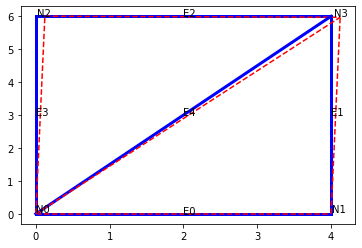

In [64]:
tr2.plot_system(show_displacement=True,magnification=10)

In [65]:
tr2.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -200000.000000, F_y: -300000.000000
                     Node 1                     
u_x: -0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 0.000000, F_y: 300000.000000
                     Node 2                     
u_x: 12.312028 x 10^-3, u_y: -0.000000 x 10^-3, F_x: 0.000000, F_y: 0.000000
                     Node 3                     
u_x: 12.312028 x 10^-3, u_y: -3.000000 x 10^-3, F_x: 200000.000000, F_y: 0.000000

                     Element 0                     
stress: -0.000000 x 10^6, strain: -0.000000
                     Element 1                     
stress: -100.000000 x 10^6, strain: -0.000500
                     Element 2                     
stress: 0.000000 x 10^6, strain: 0.000000
                     Element 3                     
stress: -0.000000 x 10^6, strain: -0.000000
                     Element 4                     
stress: 120.185043 x 10^6, strain: 0.000

# Problem 4

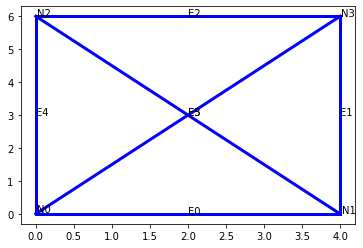

In [66]:
node_coordinates  = np.array([[0,0],
                              [4,0],
                              [0,6],
                              [4,6]])

elem_connectivity  = np.array([[0,1],
                               [1,3],
                               [2,3],
                               [2,1],  # Added this element in                             
                               [0,2],
                               [0,3]])

prescribed_displacement = np.array([[0,0,0],
                                    [0,1,0],
                                    [1,1,0]])

prescribed_force = np.array([[3,0,200E3]])


elem_E = np.array([200., 200.,200.,200.,200.,200.]) *1E9
elem_A = np.array([30,30,30,30,30.,30.])/1E4 
elem_density = np.ones(elem_A.shape)*7800.0

elemprop = {"A": elem_A,
            "E": elem_E, 
            "density": elem_density}

tr2 = sfem.FEM_Truss_2D(node_coordinates,
                            elem_connectivity,
                            prescribed_displacement,
                            prescribed_force,
                            elemprop)

tr2.plot_system()

In [67]:
tr2.solve()

{'displacements': array([ 0.        ,  0.        ,  0.00060152,  0.        ,  0.00615601,
         0.00135343,  0.00675754, -0.00164657]),
 'loads': array([-200000., -300000.,       0.,  300000.,       0.,       0.,
         200000.,       0.])}

In [68]:
tr2.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, F_x: -200000.000000, F_y: -300000.000000
                     Node 1                     
u_x: 0.601524 x 10^-3, u_y: 0.000000 x 10^-3, F_x: 0.000000, F_y: 300000.000000
                     Node 2                     
u_x: 6.156014 x 10^-3, u_y: 1.353430 x 10^-3, F_x: 0.000000, F_y: 0.000000
                     Node 3                     
u_x: 6.757538 x 10^-3, u_y: -1.646570 x 10^-3, F_x: 200000.000000, F_y: 0.000000

                     Element 0                     
stress: 30.076223 x 10^6, strain: 0.000150
                     Element 1                     
stress: -54.885665 x 10^6, strain: -0.000274
                     Element 2                     
stress: 30.076223 x 10^6, strain: 0.000150
                     Element 3                     
stress: -54.220682 x 10^6, strain: -0.000271
                     Element 4                     
stress: 45.114335 x 10^6, strain: 0.000226
 